In [1]:
import tensorflow as tf 
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt 
import numpy as np 

c:\Users\subha\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 148s 1us/step


In [4]:
print("Shape of X train", X_train.shape)
print("Shape of X test", X_test.shape)
print("Shape of y_train", y_train.shape)
print("Shape of y_test", y_test.shape)

Shape of X train (50000, 32, 32, 3)
Shape of X test (10000, 32, 32, 3)
Shape of y_train (50000, 1)
Shape of y_test (10000, 1)


In [2]:
plt.imshow(X_train[1])

NameError: name 'X_train' is not defined

In [8]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [10]:
y_train = y_train.reshape(-1, )
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [6]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [3]:
def plot_sample(X, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

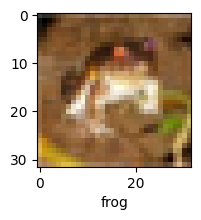

In [12]:
plot_sample(X_train, y_train, 0)

In [13]:
X_train = X_train / 255
X_test = X_test / 255 

In [14]:
cnn_model = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPool2D(),
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [15]:
cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [4]:
cnn_model.fit(X_train, y_train, epochs=10)

NameError: name 'cnn_model' is not defined

In [5]:
cnn_model.evaluate(X_test, y_test)

NameError: name 'cnn_model' is not defined

In [18]:
y_pred = cnn_model.predict(X_test)

313/313 [==============================] - 3s 8ms/step


In [19]:
y_test = y_test.reshape(-1, )

In [20]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 1, 8, 4]

In [21]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [6]:
from sklearn.metrics import classification_report
print("Classification Report:\n", classification_report(y_test, y_classes))

KeyboardInterrupt: 